# Exploratory Data Analysis and Visualization in Python (Matplotlib, Seaborn, Plotly)

Anatomy of a figure https://matplotlib.org/stable/gallery/showcase/anatomy.html
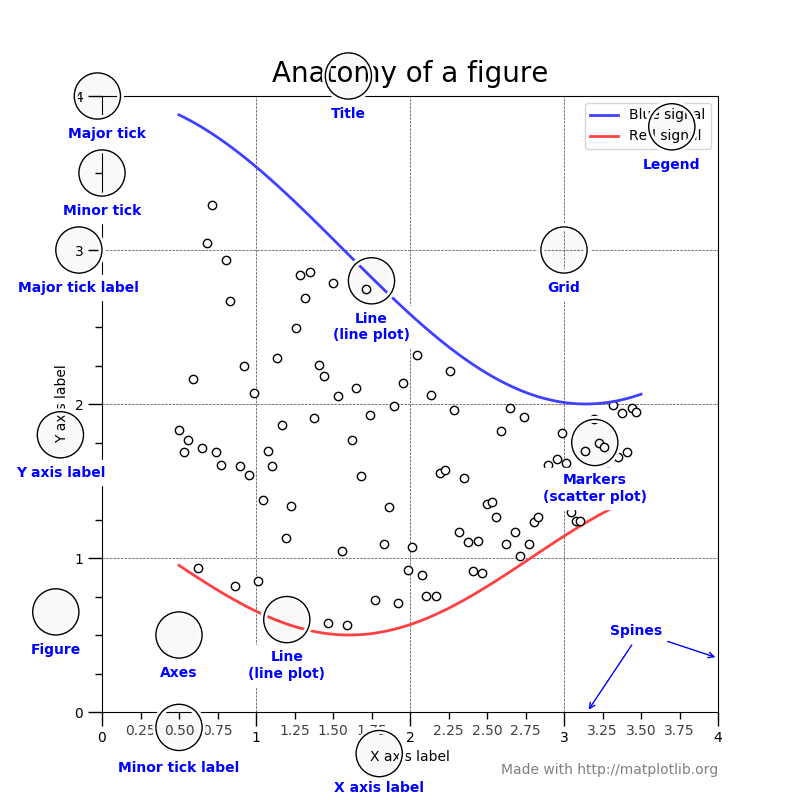

## Scatter Plot

#### Matplotlib
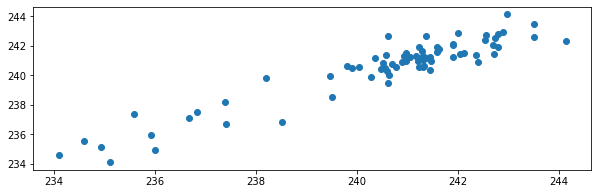

#### Seaborn
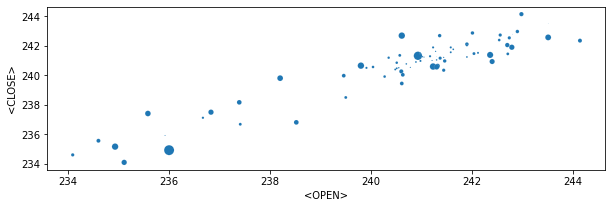

## Line Plot

#### Matplotlib
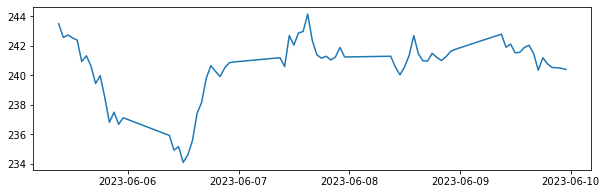

#### Seaborn
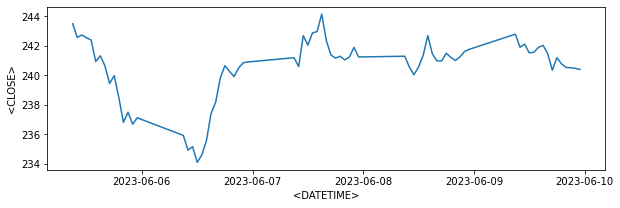

## Bar Chart

#### Matplotlib
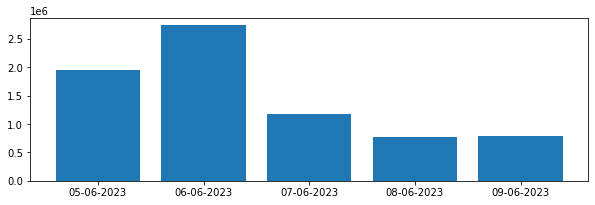

#### Seaborn
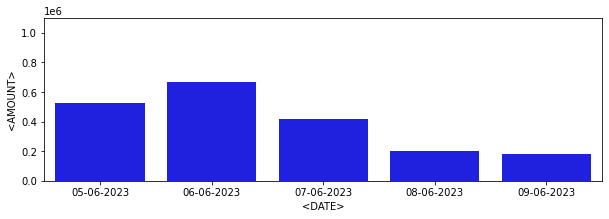

## Heatmap


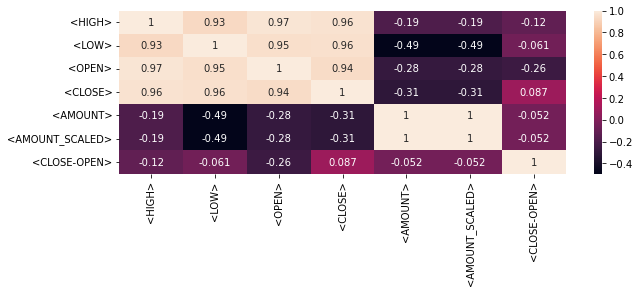

## Sber EDA
Data https://mfd.ru/export/

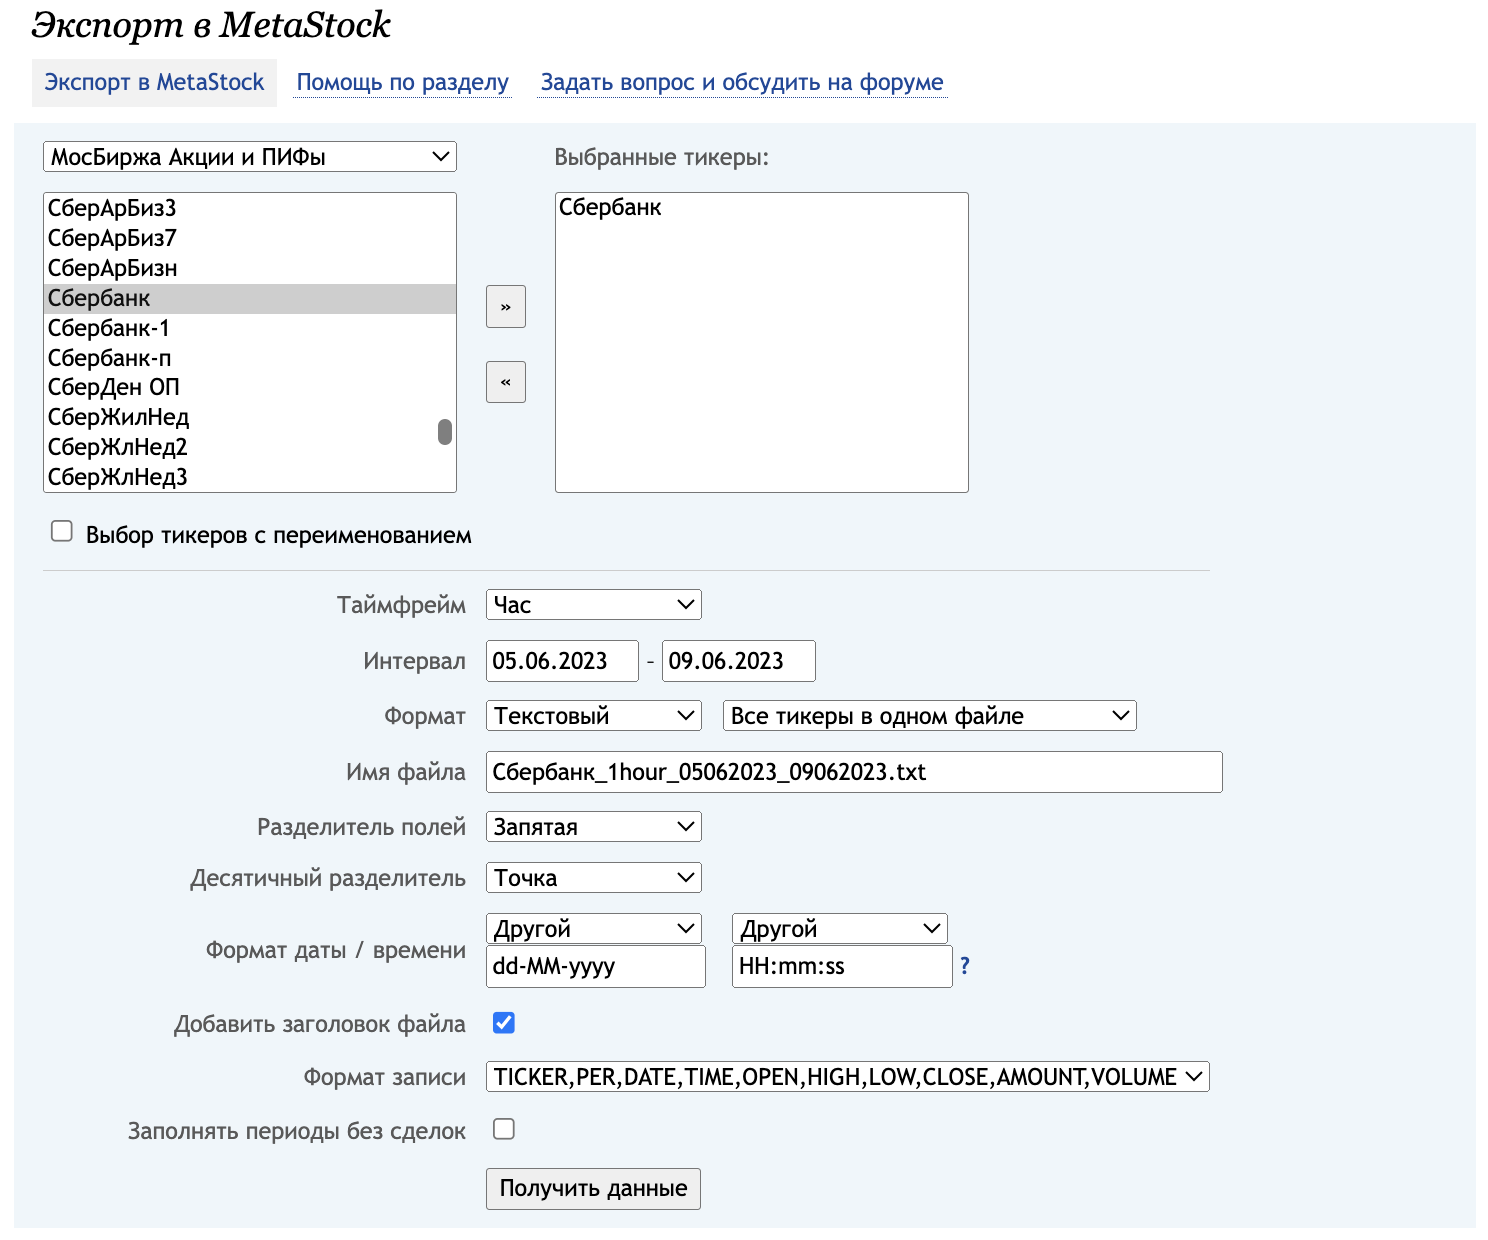

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
from sklearn.preprocessing import MinMaxScaler

init_notebook_mode(connected=True)
plt.rcParams.update({'figure.figsize': (10, 3)})

In [3]:
#df = pd.read_csv('https://mfd.ru/export/handler.ashx/%D0%A1%D0%B1%D0%B5%D1%80%D0%B1%D0%B0%D0%BD%D0%BA_1hour_05062023_09062023.txt?TickerGroup=16&Tickers=1463&Alias=false&Period=6&timeframeValue=1&timeframeDatePart=day&StartDate=05.06.2023&EndDate=09.06.2023&SaveFormat=0&SaveMode=0&FileName=%D0%A1%D0%B1%D0%B5%D1%80%D0%B1%D0%B0%D0%BD%D0%BA_1hour_05062023_09062023.txt&FieldSeparator=%2C&DecimalSeparator=.&DateFormat=dd-MM-yyyy&TimeFormat=HH%3Amm%3Ass&DateFormatCustom=dd-MM-yyyy&TimeFormatCustom=HH%3Amm%3Ass&AddHeader=true&RecordFormat=3&Fill=false')

In [4]:
df = pd.read_csv('Сбербанк_1hour_05062023_09062023.txt')
df.head()

<TICKER>  <PER>      <DATE>    <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  \
0  Сбербанк     60  05-06-2023  09:00:00  243.51  243.51  243.51   243.51   
1  Сбербанк     60  05-06-2023  10:00:00  243.51  244.15  241.75   242.58   
2  Сбербанк     60  05-06-2023  11:00:00  242.56  243.22  242.22   242.74   
3  Сбербанк     60  05-06-2023  12:00:00  242.74  242.89  241.86   242.55   
4  Сбербанк     60  05-06-2023  13:00:00  242.54  243.14  242.25   242.40   

   <AMOUNT>  <VOLUME>  
0      9155         0  
1    953878         0  
2    298104         0  
3    292476         0  
4    202041         0

In [5]:
del df['<VOLUME>']
df.head()

<TICKER>  <PER>      <DATE>    <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  \
0  Сбербанк     60  05-06-2023  09:00:00  243.51  243.51  243.51   243.51   
1  Сбербанк     60  05-06-2023  10:00:00  243.51  244.15  241.75   242.58   
2  Сбербанк     60  05-06-2023  11:00:00  242.56  243.22  242.22   242.74   
3  Сбербанк     60  05-06-2023  12:00:00  242.74  242.89  241.86   242.55   
4  Сбербанк     60  05-06-2023  13:00:00  242.54  243.14  242.25   242.40   

   <AMOUNT>  
0      9155  
1    953878  
2    298104  
3    292476  
4    202041

In [6]:
df['<DATETIME>'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'], dayfirst=True)

In [7]:
df.describe()

<PER>      <OPEN>      <HIGH>       <LOW>     <CLOSE>      <AMOUNT>
count   75.0   75.000000   75.000000   75.000000   75.000000  7.500000e+01
mean    60.0  240.531733  241.144800  239.800800  240.502933  3.996555e+05
std      0.0    2.246131    2.148657    2.461808    2.177915  4.597896e+05
min     60.0  234.090000  234.690000  232.540000  234.090000  4.848000e+03
25%     60.0  240.310000  240.790000  239.560000  240.310000  1.045280e+05
50%     60.0  241.170000  241.580000  240.510000  241.050000  2.368610e+05
75%     60.0  241.900000  242.375000  241.305000  241.700000  5.232450e+05
max     60.0  244.140000  244.390000  243.510000  244.160000  2.735777e+06

In [8]:
df.dtypes

<TICKER>              object
<PER>                  int64
<DATE>                object
<TIME>                object
<OPEN>               float64
<HIGH>               float64
<LOW>                float64
<CLOSE>              float64
<AMOUNT>               int64
<DATETIME>    datetime64[ns]
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   <TICKER>    75 non-null     object        
 1   <PER>       75 non-null     int64         
 2   <DATE>      75 non-null     object        
 3   <TIME>      75 non-null     object        
 4   <OPEN>      75 non-null     float64       
 5   <HIGH>      75 non-null     float64       
 6   <LOW>       75 non-null     float64       
 7   <CLOSE>     75 non-null     float64       
 8   <AMOUNT>    75 non-null     int64         
 9   <DATETIME>  75 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 6.0+ KB


In [10]:
df['<TICKER>'] = df['<TICKER>'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   <TICKER>    75 non-null     category      
 1   <PER>       75 non-null     int64         
 2   <DATE>      75 non-null     object        
 3   <TIME>      75 non-null     object        
 4   <OPEN>      75 non-null     float64       
 5   <HIGH>      75 non-null     float64       
 6   <LOW>       75 non-null     float64       
 7   <CLOSE>     75 non-null     float64       
 8   <AMOUNT>    75 non-null     int64         
 9   <DATETIME>  75 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 5.6+ KB


In [12]:
df['<DATETIME>'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'], dayfirst=True)
df['<CLOSE-OPEN>'] = df['<CLOSE>'] - df['<OPEN>']

In [13]:
df.head()

<TICKER>  <PER>      <DATE>    <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  \
0  Сбербанк     60  05-06-2023  09:00:00  243.51  243.51  243.51   243.51   
1  Сбербанк     60  05-06-2023  10:00:00  243.51  244.15  241.75   242.58   
2  Сбербанк     60  05-06-2023  11:00:00  242.56  243.22  242.22   242.74   
3  Сбербанк     60  05-06-2023  12:00:00  242.74  242.89  241.86   242.55   
4  Сбербанк     60  05-06-2023  13:00:00  242.54  243.14  242.25   242.40   

   <AMOUNT>          <DATETIME>  <CLOSE-OPEN>  
0      9155 2023-06-05 09:00:00          0.00  
1    953878 2023-06-05 10:00:00         -0.93  
2    298104 2023-06-05 11:00:00          0.18  
3    292476 2023-06-05 12:00:00         -0.19  
4    202041 2023-06-05 13:00:00         -0.14

#### Matplotlib

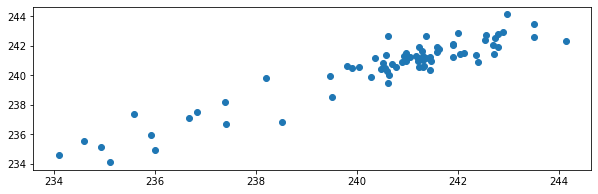

In [14]:
plt.scatter(df['<OPEN>'], df['<CLOSE>'])

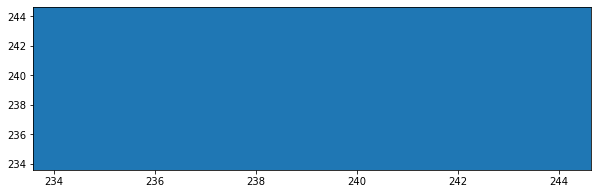

In [15]:
plt.scatter(df['<OPEN>'], df['<CLOSE>'], s=df['<AMOUNT>'])

In [16]:
# Apply MinMaxScaler() to the '<AMOUNT>' column to resolve the issue
scaler = MinMaxScaler()
df[['<AMOUNT_SCALED>']] = scaler.fit_transform(df[['<AMOUNT>']])

In [17]:
df.head()

<TICKER>  <PER>      <DATE>    <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  \
0  Сбербанк     60  05-06-2023  09:00:00  243.51  243.51  243.51   243.51   
1  Сбербанк     60  05-06-2023  10:00:00  243.51  244.15  241.75   242.58   
2  Сбербанк     60  05-06-2023  11:00:00  242.56  243.22  242.22   242.74   
3  Сбербанк     60  05-06-2023  12:00:00  242.74  242.89  241.86   242.55   
4  Сбербанк     60  05-06-2023  13:00:00  242.54  243.14  242.25   242.40   

   <AMOUNT>          <DATETIME>  <CLOSE-OPEN>  <AMOUNT_SCALED>  
0      9155 2023-06-05 09:00:00          0.00         0.001577  
1    953878 2023-06-05 10:00:00         -0.93         0.347512  
2    298104 2023-06-05 11:00:00          0.18         0.107383  
3    292476 2023-06-05 12:00:00         -0.19         0.105322  
4    202041 2023-06-05 13:00:00         -0.14         0.072207

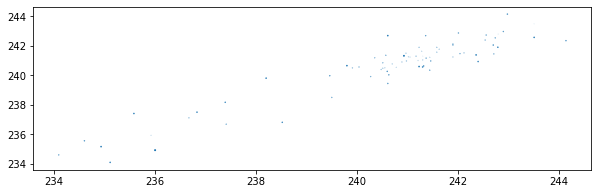

In [18]:
plt.scatter(df['<OPEN>'], df['<CLOSE>'], s=df['<AMOUNT_SCALED>'])

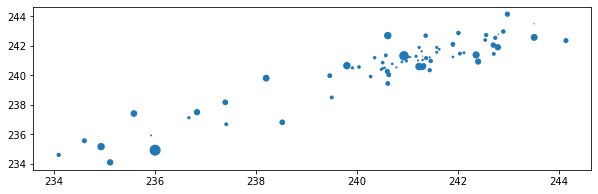

In [19]:
plt.scatter(df['<OPEN>'], df['<CLOSE>'], s=df['<AMOUNT_SCALED>']*100)

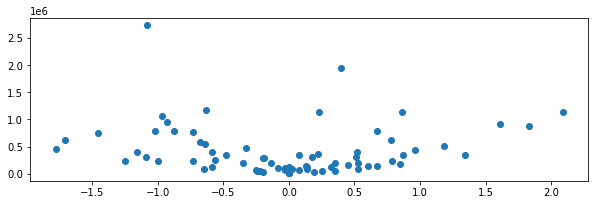

In [20]:
# Hypothesis: The larger the distance between open and close date, the larger the amount of shares traded in the given period
plt.scatter(df['<CLOSE-OPEN>'], df['<AMOUNT>'])

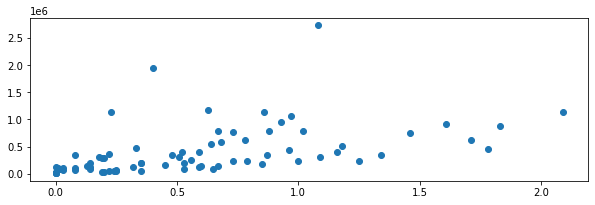

In [21]:
# Transform the data by calculating absolute value of each element
plt.scatter(np.abs(df['<CLOSE-OPEN>']), df['<AMOUNT>'])

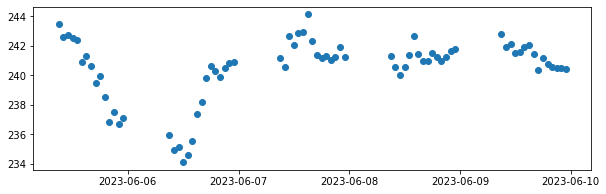

In [22]:
plt.scatter(df['<DATETIME>'], df['<CLOSE>'])

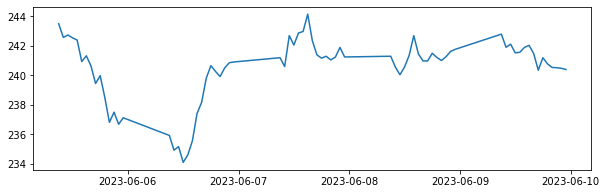

In [23]:
plt.plot(df['<DATETIME>'], df['<CLOSE>'])

<BarContainer object of 75 artists>

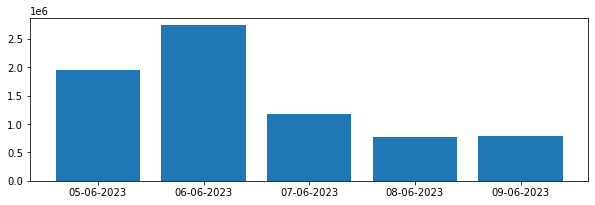

In [24]:
plt.bar(df['<DATE>'], df['<AMOUNT>'])

#### Seaborn

<AxesSubplot:xlabel='<OPEN>', ylabel='<CLOSE>'>

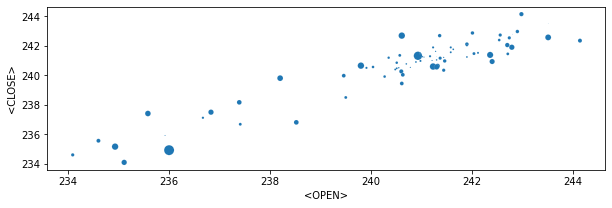

In [25]:
sns.scatterplot(data=df, x='<OPEN>', y='<CLOSE>', s=df['<AMOUNT_SCALED>']*100)

<AxesSubplot:xlabel='<OPEN>', ylabel='<CLOSE>'>

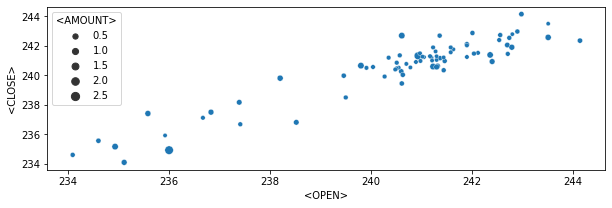

In [26]:
sns.scatterplot(data=df, x='<OPEN>', y='<CLOSE>', size=df['<AMOUNT>'])

<AxesSubplot:xlabel='<DATETIME>', ylabel='<CLOSE>'>

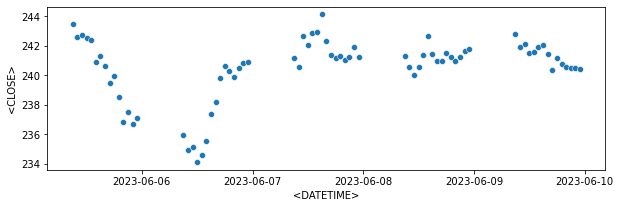

In [27]:
sns.scatterplot(data=df, x='<DATETIME>', y='<CLOSE>')

<AxesSubplot:xlabel='<DATETIME>', ylabel='<CLOSE>'>

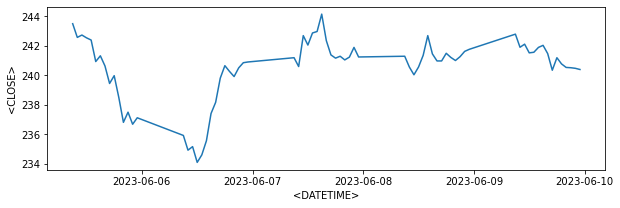

In [28]:
sns.lineplot(data=df, x='<DATETIME>', y='<CLOSE>')

<AxesSubplot:xlabel='<DATE>', ylabel='<AMOUNT>'>

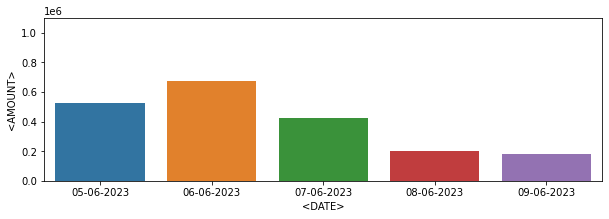

In [29]:
sns.barplot(data=df, x='<DATE>', y='<AMOUNT>', errwidth=False)

<AxesSubplot:xlabel='<DATE>', ylabel='<AMOUNT>'>

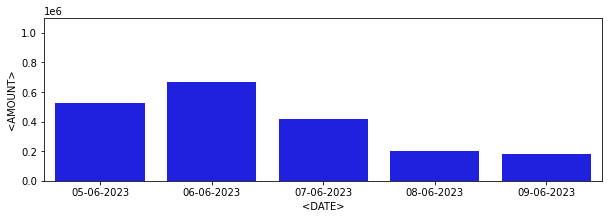

In [30]:
sns.barplot(data=df, x='<DATE>', y='<AMOUNT>', errwidth=False, color='blue')

<AxesSubplot:xlabel='<DATE>', ylabel='<AMOUNT>'>

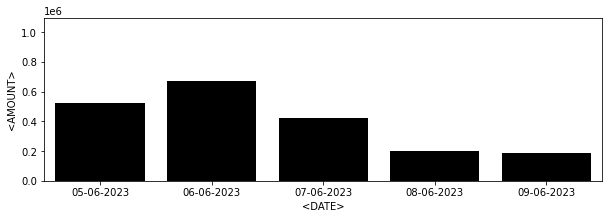

In [31]:
# Black
sns.barplot(data=df, x='<DATE>', y='<AMOUNT>', errwidth=False, color='#000')

<AxesSubplot:xlabel='<DATE>', ylabel='<AMOUNT>'>

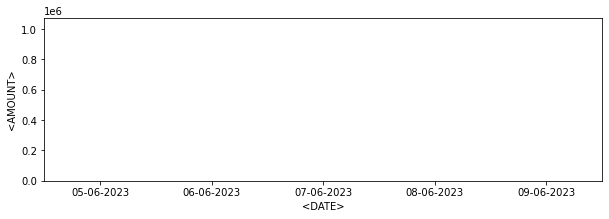

In [32]:
# White
sns.barplot(data=df, x='<DATE>', y='<AMOUNT>', errwidth=False, color='#fff')

<AxesSubplot:xlabel='<DATE>', ylabel='<AMOUNT>'>

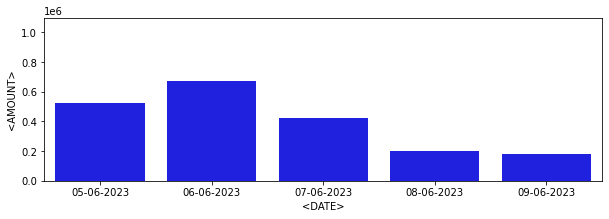

In [33]:
# Transform the data using groupby() and agg()
df_gr = df.groupby('<DATE>', as_index = False).agg({'<AMOUNT>': np.sum})
sns.barplot(data=df, x='<DATE>', y='<AMOUNT>', errwidth=False, color='blue')

In [34]:
df_gr

<DATE>  <AMOUNT>
0  05-06-2023   7845660
1  06-06-2023  10064018
2  07-06-2023   6313093
3  08-06-2023   2994547
4  09-06-2023   2756844

In [35]:
corr_excl_columns = ['<TICKER>', '<PER>', '<DATE>', '<TIME>', '<DATETIME>', '<VOLUME>']
corr_selected_columns = list(set(df.columns) - set(corr_excl_columns))
corr_selected_columns 

['<HIGH>',
 '<LOW>',
 '<OPEN>',
 '<CLOSE>',
 '<AMOUNT>',
 '<AMOUNT_SCALED>',
 '<CLOSE-OPEN>']

<AxesSubplot:>

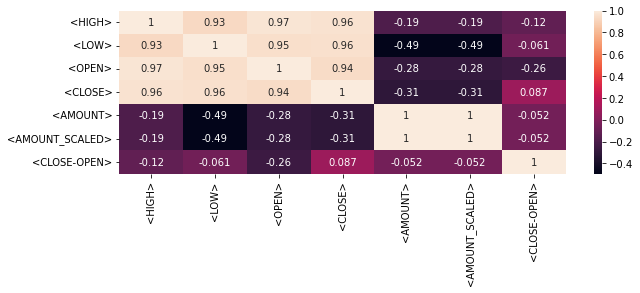

In [40]:
sns.heatmap(
    df[corr_selected_columns].corr(),
    xticklabels = df[corr_selected_columns].corr().columns,
    yticklabels = df[corr_selected_columns].corr().columns,
    annot=True
)

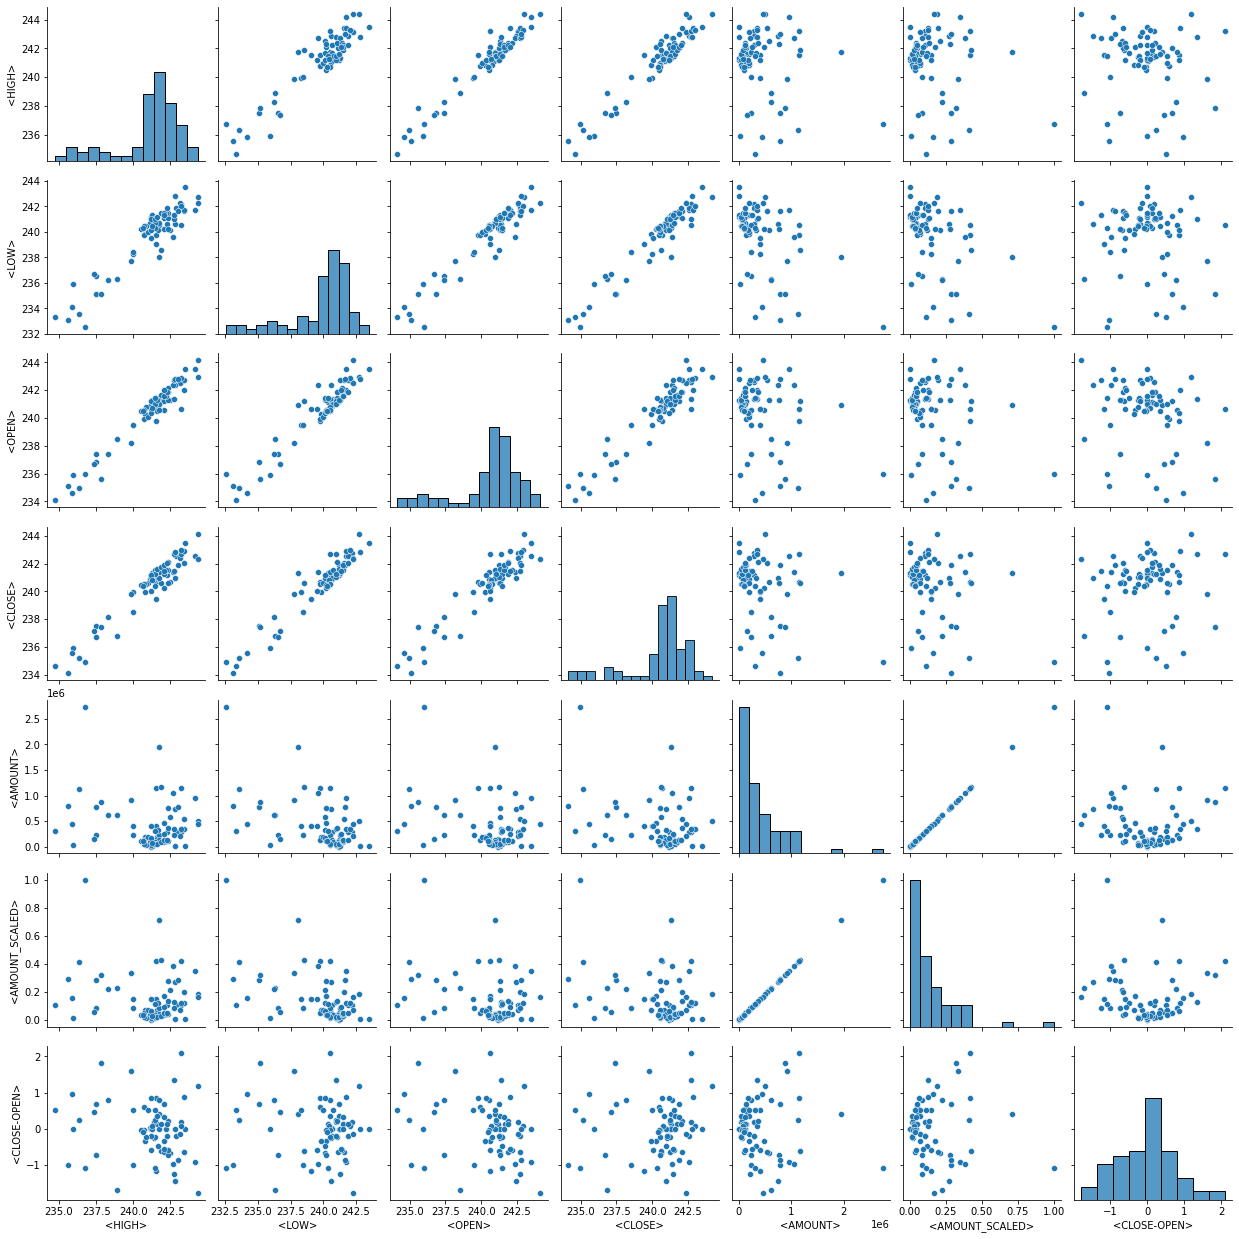

In [41]:
sns.pairplot(df, vars=corr_selected_columns)

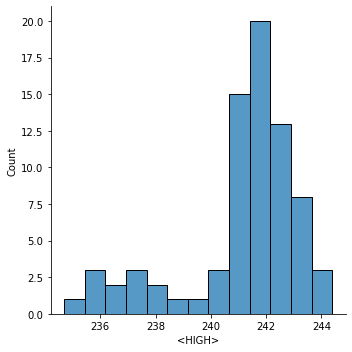

In [44]:
sns.displot(data=df, x='<HIGH>')

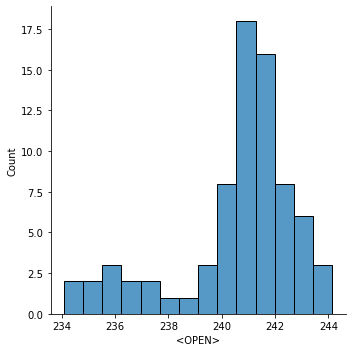

In [53]:
sns.displot(data=df, x='<OPEN>')

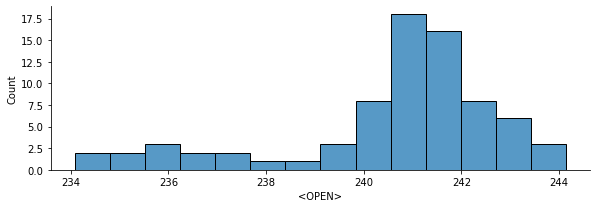

In [54]:
sns.displot(data=df, x='<OPEN>', height=3, aspect=2.8)

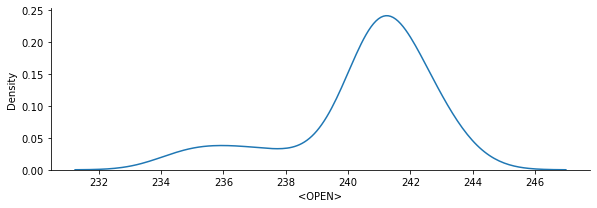

In [55]:
sns.displot(data=df, x='<OPEN>', height=3, aspect=2.8, kind='kde')

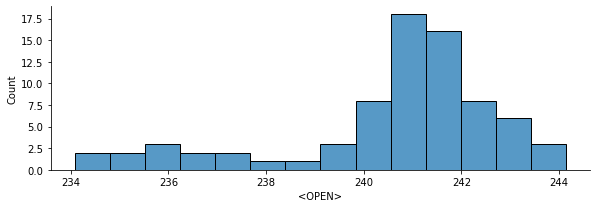

In [56]:
sns.displot(data=df, x='<OPEN>', height=3, aspect=2.8, kind='hist')

<AxesSubplot:xlabel='<DATE>', ylabel='<CLOSE>'>

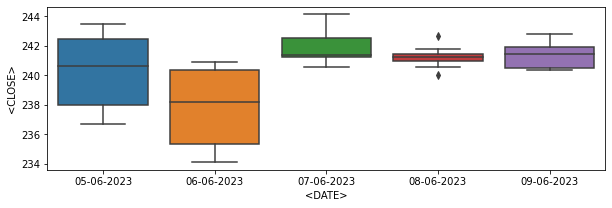

In [61]:
sns.boxplot(data=df, x='<DATE>', y='<CLOSE>')

#### Plotly

In [67]:
fig = go.Figure(data=go.Scatter(x=df['<OPEN>'], y=df['<CLOSE>'], mode='markers'))
fig.show()

In [72]:
fig = go.Figure(data=go.Scatter(x=df['<DATETIME>'], y=df['<CLOSE>'], mode='lines'))
fig.show()

In [74]:
df_gr.head()

<DATE>  <AMOUNT>
0  05-06-2023   7845660
1  06-06-2023  10064018
2  07-06-2023   6313093
3  08-06-2023   2994547
4  09-06-2023   2756844

In [76]:
fig = go.Figure(data=go.Bar(x=df_gr['<DATE>'], y=df_gr['<AMOUNT>']))
fig.show()

In [79]:
df[df['<DATE>'] == '05-06-2023']
df.head()

<TICKER>  <PER>      <DATE>    <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  \
0  Сбербанк     60  05-06-2023  09:00:00  243.51  243.51  243.51   243.51   
1  Сбербанк     60  05-06-2023  10:00:00  243.51  244.15  241.75   242.58   
2  Сбербанк     60  05-06-2023  11:00:00  242.56  243.22  242.22   242.74   
3  Сбербанк     60  05-06-2023  12:00:00  242.74  242.89  241.86   242.55   
4  Сбербанк     60  05-06-2023  13:00:00  242.54  243.14  242.25   242.40   

   <AMOUNT>          <DATETIME>  <CLOSE-OPEN>  <AMOUNT_SCALED>  
0      9155 2023-06-05 09:00:00          0.00         0.001577  
1    953878 2023-06-05 10:00:00         -0.93         0.347512  
2    298104 2023-06-05 11:00:00          0.18         0.107383  
3    292476 2023-06-05 12:00:00         -0.19         0.105322  
4    202041 2023-06-05 13:00:00         -0.14         0.072207